In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\NASA\\khammam_nasa.csv")

In [5]:
df

,Date,temp_max,rainfall
0,1/1/1991,32.26,0.06
1,2/1/1991,33.29,2.19
2,3/1/1991,30.77,0.07
3,4/1/1991,31.57,0.00
4,5/1/1991,31.28,0.00
...,...,...,...
11683,27/12/2022,29.05,0.38
11684,28/12/2022,29.52,0.36
11685,29/12/2022,29.52,0.44
11686,30/12/2022,29.23,0.07


In [6]:
df.describe()

,temp_max,rainfall
count,11688.000000,11688.000000
mean,34.207505,2.537105
std,4.935310,6.305834
min,21.650000,0.000000
25%,30.417500,0.000000
50%,32.830000,0.050000
75%,37.850000,2.080000
max,48.050000,100.800000


In [7]:
df['Date']= pd.to_datetime(df.Date, format="%d/%m/%Y")
df= df.set_index('Date') # Converting the date column into datetime object and setting it as index 

In [8]:
df['temp_max']=df["temp_max"]/50
df['rainfall']=df['rainfall']/(df['rainfall'].max())

In [9]:
df.describe()

,temp_max,rainfall
count,11688.000000,11688.000000
mean,0.684150,0.025170
std,0.098706,0.062558
min,0.433000,0.000000
25%,0.608350,0.000000
50%,0.656600,0.000496
75%,0.757000,0.020635
max,0.961000,1.000000


In [10]:
print(pd.infer_freq(df.index))

D


In [11]:
df1=df[:10958]

In [12]:
def create_data(df, lookback=365):
    df_np= df.to_numpy()
    X=[]
    y=[]
    
    for i in range(len(df_np)-2*lookback):
        row = [x for x in df_np[i:i+lookback]]
        X.append(row)
        label = [z[0] for z in df_np[i+lookback:i+(2*lookback)]]
        y.append(label)
    return np.array(X), np.array(y)

In [13]:
X,y = create_data(df1)

In [15]:
X.shape, y.shape

((10228, 365, 2), (10228, 365))

In [16]:
X_train, y_train, X_test, y_test = X[:9205], y[:9205], X[9205:], y[9205:]
X_train, y_train, X_val, y_val= X_train[:8182], y_train[:8182], X_train[8182:9205], y_train[8182:9205]

In [17]:
len(X_train), len(X_val), len(X_test)

(8182, 1023, 1023)

In [18]:
X_train.shape, y_train.shape

((8182, 365, 2), (8182, 365))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

In [20]:
khammam_temp= Sequential([
    InputLayer((365,2)),
    LSTM(units=128),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(365, activation='relu'),  
])

khammam_temp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dense_1 (Dense)             (None, 365)               187245    
                                                                 
Total params: 320,365
Trainable params: 320,365
Non-trainable params: 0
_________________________________________________________________


In [21]:
khammam_cp= ModelCheckpoint('khammam_temp/', save_best_only=True)
khammam_temp.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(),
    metrics=[MeanAbsolutePercentageError()]
)
epochs=200
history=khammam_temp.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, callbacks=[khammam_cp])

Epoch 1/200
256/256 [==============================] - ETA: 0s - loss: 0.0615 - mean_absolute_percentage_error: 22.8565

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 13s 40ms/step - loss: 0.0615 - mean_absolute_percentage_error: 22.8565 - val_loss: 0.0474 - val_mean_absolute_percentage_error: 16.7631
Epoch 2/200
255/256 [============================>.] - ETA: 0s - loss: 0.0392 - mean_absolute_percentage_error: 16.0244

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0391 - mean_absolute_percentage_error: 16.0180 - val_loss: 0.0359 - val_mean_absolute_percentage_error: 13.6979
Epoch 3/200
255/256 [============================>.] - ETA: 0s - loss: 0.0290 - mean_absolute_percentage_error: 11.8093

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0290 - mean_absolute_percentage_error: 11.8063 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 11.9674
Epoch 4/200
255/256 [============================>.] - ETA: 0s - loss: 0.0230 - mean_absolute_percentage_error: 10.0215

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0230 - mean_absolute_percentage_error: 10.0202 - val_loss: 0.0227 - val_mean_absolute_percentage_error: 10.7924
Epoch 5/200
255/256 [============================>.] - ETA: 0s - loss: 0.0198 - mean_absolute_percentage_error: 9.1985

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0198 - mean_absolute_percentage_error: 9.1974 - val_loss: 0.0213 - val_mean_absolute_percentage_error: 10.5670
Epoch 6/200
256/256 [==============================] - ETA: 0s - loss: 0.0195 - mean_absolute_percentage_error: 9.0454

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 37ms/step - loss: 0.0195 - mean_absolute_percentage_error: 9.0454 - val_loss: 0.0207 - val_mean_absolute_percentage_error: 9.7822
Epoch 7/200
255/256 [============================>.] - ETA: 0s - loss: 0.0194 - mean_absolute_percentage_error: 8.9570

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0194 - mean_absolute_percentage_error: 8.9564 - val_loss: 0.0203 - val_mean_absolute_percentage_error: 9.3611
Epoch 8/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0194 - mean_absolute_percentage_error: 8.9139 - val_loss: 0.0205 - val_mean_absolute_percentage_error: 9.5197
Epoch 9/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0193 - mean_absolute_percentage_error: 8.8915 - val_loss: 0.0207 - val_mean_absolute_percentage_error: 9.9188
Epoch 10/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0193 - mean_absolute_percentage_error: 8.8519 - val_loss: 0.0206 - val_mean_absolute_percentage_error: 9.7225
Epoch 11/200
255/256 [============================>.] - ETA: 0s - loss: 0.0181 - mean_absolute_percentage_error: 8.6187

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0181 - mean_absolute_percentage_error: 8.6188 - val_loss: 0.0190 - val_mean_absolute_percentage_error: 9.1541
Epoch 12/200
255/256 [============================>.] - ETA: 0s - loss: 0.0180 - mean_absolute_percentage_error: 8.5820

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 37ms/step - loss: 0.0180 - mean_absolute_percentage_error: 8.5815 - val_loss: 0.0190 - val_mean_absolute_percentage_error: 9.0965
Epoch 13/200
256/256 [==============================] - 7s 29ms/step - loss: 0.0180 - mean_absolute_percentage_error: 8.5383 - val_loss: 0.0193 - val_mean_absolute_percentage_error: 9.4497
Epoch 14/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0179 - mean_absolute_percentage_error: 8.4968 - val_loss: 0.0193 - val_mean_absolute_percentage_error: 9.4964
Epoch 15/200
255/256 [============================>.] - ETA: 0s - loss: 0.0175 - mean_absolute_percentage_error: 8.4530

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0175 - mean_absolute_percentage_error: 8.4517 - val_loss: 0.0177 - val_mean_absolute_percentage_error: 8.9065
Epoch 16/200
256/256 [==============================] - ETA: 0s - loss: 0.0166 - mean_absolute_percentage_error: 8.2267

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0166 - mean_absolute_percentage_error: 8.2267 - val_loss: 0.0175 - val_mean_absolute_percentage_error: 8.5643
Epoch 17/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0166 - mean_absolute_percentage_error: 8.1795 - val_loss: 0.0177 - val_mean_absolute_percentage_error: 8.9021
Epoch 18/200
256/256 [==============================] - 7s 26ms/step - loss: 0.0166 - mean_absolute_percentage_error: 8.1570 - val_loss: 0.0182 - val_mean_absolute_percentage_error: 9.3640
Epoch 19/200
254/256 [============================>.] - ETA: 0s - loss: 0.0164 - mean_absolute_percentage_error: 8.1243

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 35ms/step - loss: 0.0164 - mean_absolute_percentage_error: 8.1223 - val_loss: 0.0173 - val_mean_absolute_percentage_error: 9.5194
Epoch 20/200
254/256 [============================>.] - ETA: 0s - loss: 0.0144 - mean_absolute_percentage_error: 7.7421

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 37ms/step - loss: 0.0144 - mean_absolute_percentage_error: 7.7412 - val_loss: 0.0153 - val_mean_absolute_percentage_error: 8.6838
Epoch 21/200
256/256 [==============================] - ETA: 0s - loss: 0.0134 - mean_absolute_percentage_error: 7.4868

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 37ms/step - loss: 0.0134 - mean_absolute_percentage_error: 7.4868 - val_loss: 0.0140 - val_mean_absolute_percentage_error: 8.3851
Epoch 22/200
256/256 [==============================] - ETA: 0s - loss: 0.0126 - mean_absolute_percentage_error: 7.3406

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0126 - mean_absolute_percentage_error: 7.3406 - val_loss: 0.0135 - val_mean_absolute_percentage_error: 7.8745
Epoch 23/200
255/256 [============================>.] - ETA: 0s - loss: 0.0115 - mean_absolute_percentage_error: 7.1087

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0115 - mean_absolute_percentage_error: 7.1083 - val_loss: 0.0122 - val_mean_absolute_percentage_error: 7.6902
Epoch 24/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0113 - mean_absolute_percentage_error: 7.0377 - val_loss: 0.0124 - val_mean_absolute_percentage_error: 7.7281
Epoch 25/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0113 - mean_absolute_percentage_error: 7.0196 - val_loss: 0.0125 - val_mean_absolute_percentage_error: 7.9550
Epoch 26/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0113 - mean_absolute_percentage_error: 7.0391 - val_loss: 0.0127 - val_mean_absolute_percentage_error: 8.1658
Epoch 27/200
255/256 [============================>.] - ETA: 0s - loss: 0.0096 - mean_absolute_percentage_error: 6.6969

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 36ms/step - loss: 0.0096 - mean_absolute_percentage_error: 6.6971 - val_loss: 0.0105 - val_mean_absolute_percentage_error: 8.1957
Epoch 28/200
256/256 [==============================] - ETA: 0s - loss: 0.0081 - mean_absolute_percentage_error: 6.3756

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0081 - mean_absolute_percentage_error: 6.3756 - val_loss: 0.0085 - val_mean_absolute_percentage_error: 7.1370
Epoch 29/200
256/256 [==============================] - ETA: 0s - loss: 0.0073 - mean_absolute_percentage_error: 6.2231

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 37ms/step - loss: 0.0073 - mean_absolute_percentage_error: 6.2231 - val_loss: 0.0084 - val_mean_absolute_percentage_error: 7.0520
Epoch 30/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0073 - mean_absolute_percentage_error: 6.2159 - val_loss: 0.0088 - val_mean_absolute_percentage_error: 7.5942
Epoch 31/200
255/256 [============================>.] - ETA: 0s - loss: 0.0067 - mean_absolute_percentage_error: 6.0572

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0066 - mean_absolute_percentage_error: 6.0566 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 7.1769
Epoch 32/200
255/256 [============================>.] - ETA: 0s - loss: 0.0051 - mean_absolute_percentage_error: 5.7044

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0051 - mean_absolute_percentage_error: 5.7040 - val_loss: 0.0061 - val_mean_absolute_percentage_error: 6.9456
Epoch 33/200
255/256 [============================>.] - ETA: 0s - loss: 0.0047 - mean_absolute_percentage_error: 5.6583

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0047 - mean_absolute_percentage_error: 5.6580 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 6.6921
Epoch 34/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0047 - mean_absolute_percentage_error: 5.6203 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 6.8591
Epoch 35/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0047 - mean_absolute_percentage_error: 5.6200 - val_loss: 0.0064 - val_mean_absolute_percentage_error: 7.3363
Epoch 36/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0047 - mean_absolute_percentage_error: 5.6026 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 6.6112
Epoch 37/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0047 - mean_absolute_percentage_error: 5.5802 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 6.7941
Epoch 38/200
256/256 [==============================] - 7s 27ms/ste

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.5065 - val_loss: 0.0056 - val_mean_absolute_percentage_error: 6.2735
Epoch 42/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.4348 - val_loss: 0.0061 - val_mean_absolute_percentage_error: 6.9790
Epoch 43/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.4390 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 6.6982
Epoch 44/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0045 - mean_absolute_percentage_error: 5.4020 - val_loss: 0.0061 - val_mean_absolute_percentage_error: 6.8622
Epoch 45/200
255/256 [============================>.] - ETA: 0s - loss: 0.0037 - mean_absolute_percentage_error: 5.1935

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 37ms/step - loss: 0.0037 - mean_absolute_percentage_error: 5.1929 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 6.9334
Epoch 46/200
256/256 [==============================] - ETA: 0s - loss: 0.0032 - mean_absolute_percentage_error: 5.0937

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 36ms/step - loss: 0.0032 - mean_absolute_percentage_error: 5.0937 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 6.7267
Epoch 47/200
254/256 [============================>.] - ETA: 0s - loss: 0.0032 - mean_absolute_percentage_error: 5.0512

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0032 - mean_absolute_percentage_error: 5.0504 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 6.5800
Epoch 48/200
256/256 [==============================] - ETA: 0s - loss: 0.0032 - mean_absolute_percentage_error: 5.0521

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 36ms/step - loss: 0.0032 - mean_absolute_percentage_error: 5.0521 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 6.5279
Epoch 49/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0032 - mean_absolute_percentage_error: 5.0146 - val_loss: 0.0049 - val_mean_absolute_percentage_error: 6.8289
Epoch 50/200
256/256 [==============================] - 7s 26ms/step - loss: 0.0031 - mean_absolute_percentage_error: 4.9683 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 6.6305
Epoch 51/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0031 - mean_absolute_percentage_error: 4.9595 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 6.9193
Epoch 52/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0031 - mean_absolute_percentage_error: 4.9114 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 6.6788
Epoch 53/200
256/256 [==============================] - 7s 27ms/step

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 38ms/step - loss: 0.0030 - mean_absolute_percentage_error: 4.7622 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 6.4134
Epoch 59/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0030 - mean_absolute_percentage_error: 4.7499 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 6.7103
Epoch 60/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0030 - mean_absolute_percentage_error: 4.7456 - val_loss: 0.0053 - val_mean_absolute_percentage_error: 7.2540
Epoch 61/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0030 - mean_absolute_percentage_error: 4.7377 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 6.6902
Epoch 62/200
256/256 [==============================] - 7s 26ms/step - loss: 0.0030 - mean_absolute_percentage_error: 4.7497 - val_loss: 0.0051 - val_mean_absolute_percentage_error: 6.9818
Epoch 63/200
254/256 [============================>.] - ETA: 0s - l

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 37ms/step - loss: 0.0029 - mean_absolute_percentage_error: 4.6932 - val_loss: 0.0045 - val_mean_absolute_percentage_error: 6.3486
Epoch 64/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0029 - mean_absolute_percentage_error: 4.7070 - val_loss: 0.0049 - val_mean_absolute_percentage_error: 6.7577
Epoch 65/200
256/256 [==============================] - 7s 26ms/step - loss: 0.0029 - mean_absolute_percentage_error: 4.6471 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 6.5905
Epoch 66/200
256/256 [==============================] - 7s 26ms/step - loss: 0.0029 - mean_absolute_percentage_error: 4.6581 - val_loss: 0.0045 - val_mean_absolute_percentage_error: 6.4180
Epoch 67/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0029 - mean_absolute_percentage_error: 4.6331 - val_loss: 0.0049 - val_mean_absolute_percentage_error: 6.8229
Epoch 68/200
256/256 [==============================] - 7s 26ms/step

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 36ms/step - loss: 0.0016 - mean_absolute_percentage_error: 3.9905 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 6.7576
Epoch 116/200
254/256 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_percentage_error: 3.8865

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 39ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8854 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 6.7371
Epoch 117/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8753 - val_loss: 0.0039 - val_mean_absolute_percentage_error: 6.9139
Epoch 118/200
255/256 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_percentage_error: 3.9016

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 36ms/step - loss: 0.0013 - mean_absolute_percentage_error: 3.9019 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 6.6810
Epoch 119/200
256/256 [==============================] - 7s 28ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8885 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 6.7333
Epoch 120/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8752 - val_loss: 0.0039 - val_mean_absolute_percentage_error: 6.8768
Epoch 121/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8604 - val_loss: 0.0039 - val_mean_absolute_percentage_error: 6.9216
Epoch 122/200
254/256 [============================>.] - ETA: 0s - loss: 0.0012 - mean_absolute_percentage_error: 3.8492

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 9s 37ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8496 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 6.4871
Epoch 123/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8659 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 7.0234
Epoch 124/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8274 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 7.0561
Epoch 125/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8446 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 6.7759
Epoch 126/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8387 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 6.8446
Epoch 127/200
256/256 [==============================] - 7s 26ms

INFO:tensorflow:Assets written to: khammam_temp\assets


INFO:tensorflow:Assets written to: khammam_temp\assets


256/256 [==============================] - 10s 37ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8211 - val_loss: 0.0033 - val_mean_absolute_percentage_error: 6.2629
Epoch 137/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7896 - val_loss: 0.0036 - val_mean_absolute_percentage_error: 6.5964
Epoch 138/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7762 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 6.6752
Epoch 139/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8007 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 6.8160
Epoch 140/200
256/256 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7912 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 6.7227
Epoch 141/200
256/256 [==============================] - 7s 27m

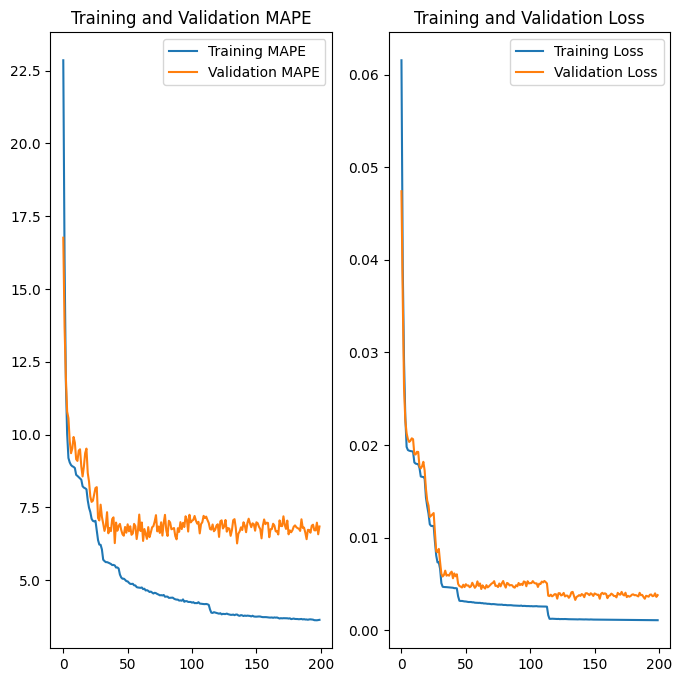

In [22]:
acc = history.history['mean_absolute_percentage_error']
val_acc = history.history['val_mean_absolute_percentage_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAPE')
plt.plot(epochs_range, val_acc, label='Validation MAPE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAPE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
from tensorflow import keras

In [18]:
khammam_temp.save("khammam_heat_nasa.h5", save_format='h5')

NameError: name 'khammam_temp' is not defined

In [29]:
res=khammam_temp.evaluate(X_test,y_test)

32/32 [==============================] - 0s 12ms/step - loss: 0.0021 - mean_absolute_percentage_error: 5.1541


In [30]:
test_x=df[10958:11323]                             #year 2021 data to predict data for 2022
display(test_x)
test_x=test_x.to_numpy()
test_x=test_x.reshape(1,365,2)
test_x

,temp_max,rainfall
Date,,
2021-01-01,0.5242,0.000099
2021-01-02,0.5238,0.000000
2021-01-03,0.5268,0.000000
2021-01-04,0.5262,0.000000
2021-01-05,0.5716,0.000397
...,...,...
2021-12-27,0.5738,0.000000
2021-12-28,0.5816,0.000000
2021-12-29,0.5878,0.000000


array([[[5.24200000e-01, 9.92063492e-05],
        [5.23800000e-01, 0.00000000e+00],
        [5.26800000e-01, 0.00000000e+00],
        [5.26200000e-01, 0.00000000e+00],
        [5.71600000e-01, 3.96825397e-04],
        [5.40600000e-01, 5.95238095e-04],
        [5.76600000e-01, 9.92063492e-05],
        [5.76000000e-01, 0.00000000e+00],
        [5.69000000e-01, 0.00000000e+00],
        [5.80200000e-01, 0.00000000e+00],
        [5.88000000e-01, 0.00000000e+00],
        [5.92800000e-01, 0.00000000e+00],
        [5.96000000e-01, 0.00000000e+00],
        [5.83800000e-01, 0.00000000e+00],
        [5.90600000e-01, 0.00000000e+00],
        [5.93400000e-01, 0.00000000e+00],
        [5.83600000e-01, 0.00000000e+00],
        [5.73200000e-01, 0.00000000e+00],
        [5.86400000e-01, 0.00000000e+00],
        [6.02800000e-01, 0.00000000e+00],
        [6.20200000e-01, 0.00000000e+00],
        [6.04600000e-01, 0.00000000e+00],
        [6.05200000e-01, 0.00000000e+00],
        [6.12200000e-01, 0.0000000

In [25]:
test_y=df['temp_max'][11323:]                      #year 2022 data to validate the prediction of model
test_y=test_y.to_numpy()
test_y

array([0.586 , 0.584 , 0.5916, 0.5752, 0.578 , 0.5876, 0.5944, 0.598 ,
       0.6004, 0.6086, 0.6056, 0.5902, 0.5818, 0.5864, 0.57  , 0.5792,
       0.5676, 0.5924, 0.586 , 0.6016, 0.6386, 0.643 , 0.6262, 0.6156,
       0.5782, 0.591 , 0.589 , 0.5888, 0.6068, 0.6256, 0.646 , 0.6468,
       0.6632, 0.652 , 0.6466, 0.6446, 0.638 , 0.6596, 0.6498, 0.6566,
       0.644 , 0.6596, 0.659 , 0.6632, 0.6632, 0.6574, 0.6582, 0.6652,
       0.6724, 0.683 , 0.7302, 0.7314, 0.7322, 0.7116, 0.7122, 0.7342,
       0.7122, 0.7114, 0.725 , 0.7434, 0.7396, 0.7394, 0.7446, 0.7478,
       0.7524, 0.7492, 0.7492, 0.7754, 0.7584, 0.7806, 0.7788, 0.723 ,
       0.794 , 0.8124, 0.8324, 0.8514, 0.8218, 0.7982, 0.8164, 0.841 ,
       0.8306, 0.8346, 0.8186, 0.8216, 0.833 , 0.838 , 0.8408, 0.8544,
       0.857 , 0.8496, 0.8336, 0.818 , 0.8266, 0.8146, 0.815 , 0.8174,
       0.8026, 0.8174, 0.8056, 0.8238, 0.8102, 0.8282, 0.8188, 0.8382,
       0.8492, 0.8356, 0.7974, 0.8396, 0.8614, 0.848 , 0.8218, 0.828 ,
      

In [31]:
predictions2=khammam_temp.predict(test_x)

1/1 [==============================] - 0s 26ms/step


In [32]:
predictions2= predictions2.reshape(365)
predictions2= pd.DataFrame(data=predictions2, index=df[11323:].index)

In [33]:
predictions2.shape

(365, 1)

In [34]:
predictions2=predictions2*50

In [35]:
expected=pd.DataFrame(data=test_y, index=df[11323:].index, columns=["temp_max_actual"])

In [36]:
expected=expected*50

In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [59]:
rmse= mse(expected, predictions2, squared=False)
print("RMSE: ",rmse)
mae1= mae(expected, predictions2)
print("MAE: ",mae1)
mape1= mape(expected, predictions2)
print("MAPE: {}%".format(mape1*100))

RMSE:  3.2047273492397577
MAE:  2.496681560568614
MAPE: 7.94421655675957%


The above results shows that our model can perform very well in real world deployment as we used data from 2021 to predict data for 2022, both of these were never used earlier to train, test or validate model. So the results here depict real world accuracies.

In [39]:
prediction_low=predictions2-mae1
prediction_upper=predictions2+mae1

In [40]:
prediction_upper.columns=['upper bound temp']
prediction_low.columns=['lower bound temp']
predictions2.columns=['predicted temp']

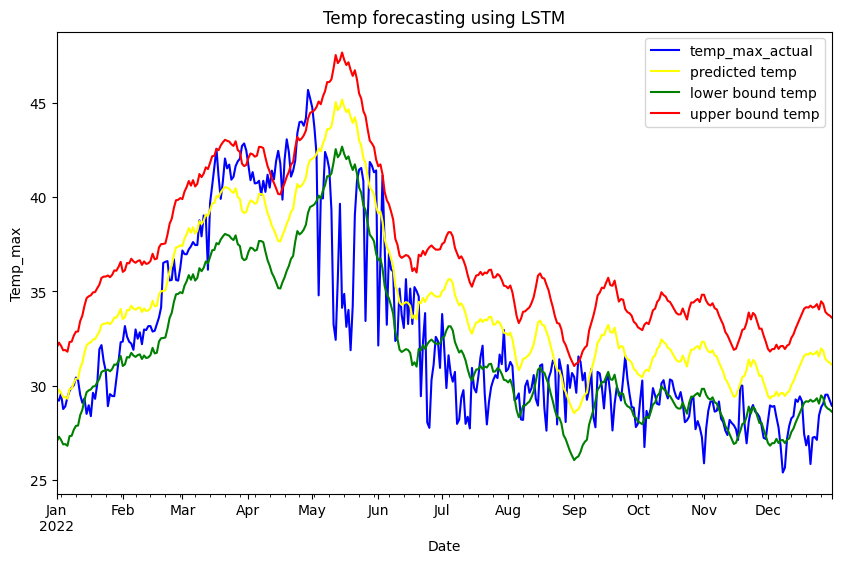

In [41]:
# Plotting to check how our actual and predicted temperature differ altogether
ax = expected.plot(
    figsize=(10, 6),
    color="blue",
    title="Temp forecasting using LSTM",
)
ax.set_ylabel("Temp_max")
ax.set_xlabel("Year")

predictions2.plot(ax=ax, color="yellow")     
prediction_low.plot(ax=ax, color="green")
prediction_upper.plot(ax=ax, color="red")
plt.show()

In [2]:
from tensorflow import keras

In [3]:
model = keras.models.load_model("khammam_heat_nasa.h5")

,temp_max,rainfall
Date,,
2022-01-01,0.5860,0.000000
2022-01-02,0.5840,0.000000
2022-01-03,0.5916,0.000000
2022-01-04,0.5752,0.000000
2022-01-05,0.5780,0.000000
...,...,...
2022-12-27,0.5810,0.003770
2022-12-28,0.5904,0.003571
2022-12-29,0.5904,0.004365


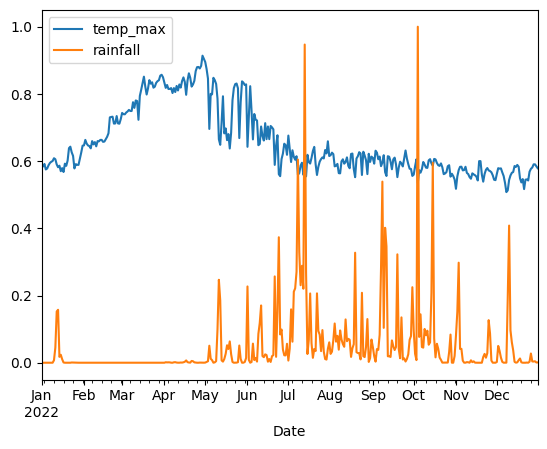

In [10]:
test_x1=df[11323:]                                      #data of year 2022 to predict temp data for 2023
(test_x1).plot()
display(test_x1)
test_x1=test_x1.to_numpy()
test_x1=test_x1.reshape(1,365,2)


In [23]:
pred1= model.predict(test_x1)                          #prediction values for year 2023

1/1 [==============================] - 0s 48ms/step


In [20]:
pred1

array([[0.57775635, 0.5794764 , 0.576092  , 0.5779199 , 0.5779631 ,
        0.57693124, 0.58570683, 0.59003395, 0.5931898 , 0.601463  ,
        0.60003436, 0.61393404, 0.61990964, 0.63072896, 0.638021  ,
        0.63800013, 0.63497436, 0.6352103 , 0.6304518 , 0.62871003,
        0.62800103, 0.63448584, 0.6340374 , 0.6305069 , 0.62672585,
        0.6256063 , 0.6276202 , 0.63064116, 0.6314935 , 0.63735247,
        0.6415448 , 0.6347854 , 0.6393502 , 0.64926636, 0.65341806,
        0.6617192 , 0.6653123 , 0.66645104, 0.66658974, 0.6709585 ,
        0.67088354, 0.6762838 , 0.68239766, 0.68407655, 0.68686354,
        0.6965718 , 0.6923642 , 0.6921017 , 0.70205283, 0.699403  ,
        0.6935761 , 0.6865939 , 0.6902961 , 0.6924586 , 0.6964889 ,
        0.70398724, 0.7118565 , 0.70953554, 0.71337146, 0.7156023 ,
        0.7297778 , 0.737157  , 0.74717295, 0.748941  , 0.7593943 ,
        0.75571555, 0.7602894 , 0.7723665 , 0.77328444, 0.77610224,
        0.7791513 , 0.77627516, 0.7861601 , 0.79

In [24]:
pred1 = pred1.reshape(365)
pred2 = pd.DataFrame(data=pred1,index=df[11323:].index, columns=['temp_max'])                       
pred2["temp_max"] = pred2["temp_max"]*50                #denormalisation  
pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21212\4161185875.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')


In [25]:
pred2

,temp_max,date
Date,,
2022-01-01,31.377817,2023-01-01
2022-01-02,31.463821,2023-01-02
2022-01-03,31.294600,2023-01-03
2022-01-04,31.385994,2023-01-04
2022-01-05,31.388155,2023-01-05
...,...,...
2022-12-27,31.108675,2023-12-27
2022-12-28,30.812693,2023-12-28
2022-12-29,31.009481,2023-12-29


In [26]:
pred4=pred2.copy()
pred4=pred4.set_index('date')
pred4.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\khammam_prediction_temp2.csv")     #saving predicted data as csv

In [27]:
norm= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Normals\\temp_normals.csv")          #data of districtwise monthly climatic normal 1991-2021 

According to IMD, heatwave need not to be considered untill max temp reaches atleast 40 deg celsius,
so we'll filter the data accordingly

In [35]:
pred2= pred2.loc[(pred2['temp_max']>=40)]
# pred2= pred2.sort_values(by=['date'])
pred2['month']=pred2['date'].dt.month
pred2['normal']=pred2['month'].astype(float)

In [36]:
for i in range(len(pred2['temp_max'])):
    pred2['normal'][i] = float(norm['Khammam'][int(pred2["month"][i])-1]) 
pred2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21212\2408559818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['normal'][i] = float(norm['Khammam'][int(pred2["month"][i])-1])


,temp_max,date,month,normal,diff
Date,,,,,
2022-03-06,40.459717,2023-03-06,3,37.1,3.359717
2022-03-07,40.275780,2023-03-07,3,37.1,3.175780
2022-03-08,40.504471,2023-03-08,3,37.1,3.404471
2022-03-09,41.108326,2023-03-09,3,37.1,4.008326
2022-03-10,41.154224,2023-03-10,3,37.1,4.054224
...,...,...,...,...,...
2022-05-20,41.381100,2023-05-20,5,41.1,0.281100
2022-05-21,41.515324,2023-05-21,5,41.1,0.415324
2022-05-22,41.128109,2023-05-22,5,41.1,0.028109


Next we will have to calculate departure from normal, but, Why are we calculating departure from normal?

According to IMD,

When normal maximum temperature of a station is less than or equal to 40°C Heat Wave Departure from normal is 5°C to 6°C Severe Heat Wave Departure from normal is 7°C or more

When normal maximum temperature of a station is more than 40°C Heat Wave Departure from normal is 4°C to 5°C Severe Heat Wave Departure from normal is 6°C or more

When actual maximum temperature remains 45°C or more irrespective of normal maximum temperature, heat waves should be declared.

In [30]:
pred2["diff"]= pred2['temp_max']-pred2['normal']                    #calculating departure from normal
pred3=pred2.loc[((pred2['normal']<=40) & (pred2['diff']>=5)) | ((pred2['normal']>=40) & (pred2['diff']>=4)) | (pred2['temp_max']>=45)]
pred3["heat"]=(pred3["temp_max"]).astype(str)
pred3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21212\802398353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3["heat"]=(pred3["temp_max"]).astype(str)


,temp_max,date,month,normal,diff,heat
Date,,,,,,
2022-03-16,42.135403,2023-03-16,3,37.1,5.035403,42.135403
2022-03-17,42.296387,2023-03-17,3,37.1,5.196387,42.296387
2022-03-18,42.214531,2023-03-18,3,37.1,5.114531,42.21453
2022-03-19,42.382748,2023-03-19,3,37.1,5.282748,42.382748
2022-03-20,42.565857,2023-03-20,3,37.1,5.465857,42.565857
2022-03-21,42.610882,2023-03-21,3,37.1,5.510882,42.61088
2022-03-22,42.732109,2023-03-22,3,37.1,5.632109,42.73211
2022-03-23,42.864227,2023-03-23,3,37.1,5.764227,42.864227
2022-03-24,42.921482,2023-03-24,3,37.1,5.821482,42.921482


In [31]:
for i in range(len(pred3['temp_max'])):          #classification of heatwave and severe heatwave
    if (((pred3['normal'][i]<=40) & (pred2['diff'][i]<7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]<6))):
        pred3['heat'][i]='Warning! Heatwave expected'
    elif (((pred3['normal'][i]<=40) & (pred2['diff'][i]>=7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]>=6)) | (pred2['temp_max']>=45)):
        pred3['heat'][i]='Warning! Severe Heatwave expected'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21212\112532292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3['heat'][i]='Warning! Heatwave expected'


In [32]:
pred3

,temp_max,date,month,normal,diff,heat
Date,,,,,,
2022-03-16,42.135403,2023-03-16,3,37.1,5.035403,Warning! Heatwave expected
2022-03-17,42.296387,2023-03-17,3,37.1,5.196387,Warning! Heatwave expected
2022-03-18,42.214531,2023-03-18,3,37.1,5.114531,Warning! Heatwave expected
2022-03-19,42.382748,2023-03-19,3,37.1,5.282748,Warning! Heatwave expected
2022-03-20,42.565857,2023-03-20,3,37.1,5.465857,Warning! Heatwave expected
2022-03-21,42.610882,2023-03-21,3,37.1,5.510882,Warning! Heatwave expected
2022-03-22,42.732109,2023-03-22,3,37.1,5.632109,Warning! Heatwave expected
2022-03-23,42.864227,2023-03-23,3,37.1,5.764227,Warning! Heatwave expected
2022-03-24,42.921482,2023-03-24,3,37.1,5.821482,Warning! Heatwave expected


In [33]:
pred3=pred3.set_index('date')
pred3=pred3.drop(['month', 'normal', 'diff'], axis=1)
pred3 # Final data frame containing the predictions for occurence of heat wave in Khammam 

,temp_max,heat
date,,
2023-03-16,42.135403,Warning! Heatwave expected
2023-03-17,42.296387,Warning! Heatwave expected
2023-03-18,42.214531,Warning! Heatwave expected
2023-03-19,42.382748,Warning! Heatwave expected
2023-03-20,42.565857,Warning! Heatwave expected
2023-03-21,42.610882,Warning! Heatwave expected
2023-03-22,42.732109,Warning! Heatwave expected
2023-03-23,42.864227,Warning! Heatwave expected
2023-03-24,42.921482,Warning! Heatwave expected


In [34]:
pred3.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\khammam_heatwave_prediction.csv")  #saving dataframe as csvhttp://localhost:8888/?token=05da3b7e9964cfcc2a9bf60fb83e9ad95c5d2bbc7ccf4fc7 file